# **PART 5. 정형 데이터 마이닝**

## **1. 데이터 분할과 성과분석**
### **가. 데이터 분할** 
: 데이터 분할은 train, validation, test data로 분할하여 모델 평가에 사용   
전체데이터에서 각각 train(50%), validataion(30%), test(20%)로 분할하며,    
데이터의 갯수가 작으면 validation을 생략하고 training과 test를 6:4 또는 7:3으로 두고 분석을 진행.   

In [ ]:
import pandas as pd
credit_df=pd.read_csv(r'C:\ISLR-python-master\Notebooks\Data\credit_final.csv')
credit_df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   credit.rating                   1000 non-null   int64
 1   account.balance                 1000 non-null   int64
 2   credit.duration.months          1000 non-null   int64
 3   previous.credit.payment.status  1000 non-null   int64
 4   credit.purpose                  1000 non-null   int64
 5   credit.amount                   1000 non-null   int64
 6   savings                         1000 non-null   int64
 7   employment.duration             1000 non-null   int64
 8   installment.rate                1000 non-null   int64
 9   marital.status                  1000 non-null   int64
 10  guarantor                       1000 non-null   int64
 11  residence.duration              1000 non-null   int64
 12  current.assets                  1000 non-null   int64
 13  age 

In [ ]:
! pip install fast-ml

In [ ]:
# train 50%, validation 30%, test 20%
# 임의로 y를 credit.rating로 지정해서 함수를 사용해줌.  

from fast_ml.model_development import train_valid_test_split
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(credit_df, target = 'credit.rating',
train_size=0.5, valid_size=0.3, test_size=0.2)
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(500, 20)
(500,)
(300, 20)
(300,)
(200, 20)
(200,)


(None, None)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(credit_df, credit_df['credit.rating'], test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(700, 21)
(700,)
(300, 21)
(300,)


(None, None)

### **나. 데이터 분할** 
: 성과분석은 데이터마이닝을 통해 train set으로 모델링 한 뒤, 
test set으로 정확도, 특이도 등을 알아보기 위한 과정

**1) confusionMatrix**   
: caret패키지에서 제공하는 confusionMatriox를 활용하면 (R기준)    
정확도, 특이도 등이 손쉽게 정리된 결과를 얻을 수 있음.

Question 2) confusion matrix를 활용한 성과분석

In [ ]:
predicted = pd.DataFrame({'a':[1,0,0,1,1,1,0,0,0,1,1,1]})
actual= pd.DataFrame({'b':[1,0,0,1,1,0,1,1,0,1,1,1]})

In [ ]:
predicted

,a
0,1
1,0
2,0
3,1
4,1
5,1
6,0
7,0
8,0
9,1


In [ ]:
actual

,b
0,1
1,0
2,0
3,1
4,1
5,0
6,1
7,1
8,0
9,1


In [ ]:
# 분할표 그리기
pd.crosstab(predicted.a, actual.b)

b,0,1
a,,
0,3,2
1,1,6


In [ ]:
len(predicted.a[predicted.a==actual.b])/len(actual.b)

0.75

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predicted.a, actual.b)

array([[3, 2],
       [1, 6]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score
print(classification_report(predicted.a, actual.b))

NameError: ignored

**2) ROC CURVE**    
: 이진 분류 분석 모형을 비교 분석 결과를 가시화할 수 있다는 점에서 유용한 평가 도구.   
ROC 그래프의 가로축은 1-특이도, 세로축은 민감도로 구성되어 이 두 값의 관계로 모형을 평가   
모형의 성과를 평가하는 기준은 ROC 그래프의 밑부분 면적(Area Under the ROC Curve,AUC)이 넓을수록 좋은 모형

Question 3)

In [ ]:
import numpy as np
probability=np.random.uniform(0, 1, 100)

In [ ]:
probability

array([0.99798581, 0.33094771, 0.28961433, 0.35628105, 0.46192788,
       0.42983551, 0.65173286, 0.32569915, 0.53609139, 0.97061617,
       0.38555634, 0.11337716, 0.93616307, 0.37514046, 0.70717196,
       0.63664268, 0.80447594, 0.6496585 , 0.43844127, 0.18561616,
       0.72387917, 0.6483423 , 0.39365385, 0.38791959, 0.49137924,
       0.44996834, 0.9229431 , 0.97712471, 0.25167731, 0.48726522,
       0.16944443, 0.8699372 , 0.05539143, 0.66304296, 0.66129575,
       0.50565734, 0.21751974, 0.35369927, 0.02270874, 0.85156617,
       0.90348452, 0.45342286, 0.41579149, 0.0917435 , 0.12217906,
       0.34029944, 0.28971588, 0.77492502, 0.79517578, 0.73288389,
       0.31520766, 0.04910755, 0.76699704, 0.57231847, 0.72254452,
       0.79254484, 0.28081517, 0.62198794, 0.41974692, 0.32357122,
       0.1483955 , 0.58803982, 0.04588622, 0.63170772, 0.91042352,
       0.92192003, 0.2327631 , 0.82393323, 0.400838  , 0.7809014 ,
       0.45422855, 0.55176666, 0.3400064 , 0.72601239, 0.85954

In [ ]:
from sklearn.preprocessing import Binarizer

In [ ]:
transformer = Binarizer(threshold=.5).fit(probability.reshape(1,-1))

In [ ]:
labels=transformer.transform(probability.reshape(1,-1))
labels

array([[1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
        1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
        0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
        1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
        0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
        0., 0., 1., 1.]])

In [ ]:
labels=labels.reshape(100)

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
roc_auc_score(pred, probability)

1.0

<font color=blue> R에서의 prediction 함수를 python으로 찾지 못하겠음. 

## **2. 분류분석**   
: 분류분석은 데이터가 어떤 그룹에 속하는지 예측하는데 사용하는 기법.   
: 의사결정나무, 앙상블기법, 인공신경망 등이 있음.    
: ADP 실기에서는 "분류기법들을 활용해 가장 정확도같은 지표가 좋은 기법과 결과를 보고서에 나타내라"는 
형식의 문제가 출제됨. 

credit 데이터셋을 활용해 분석과 성과 분석 결과를 확인.   

In [ ]:
import pandas as pd
credit_df=pd.read_csv(r'C:\ISLR-python-master\Notebooks\Data\credit_final.csv')
credit_df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(credit_df, credit_df['credit.rating'], test_size=0.3, random_state=42)

In [ ]:
X_train=X_train.loc[:, 'account.balance': 'foreign.worker']

In [ ]:
X_test=X_test.loc[:, 'account.balance': 'foreign.worker']

### **가. 로지스틱 회귀분석**
: 반응변수가 범주형인 경우 적용되는 회귀분석   
새로운 설명변수가 주어질 때 반응변수의 각 범주에 속할 확률이 얼마인지를 추정하여   
추정확률을 기준치에 따라 분류하는 목적으로 활용   

#### 1) GLM

In [ ]:
import statsmodels.api as sm

In [ ]:
logit_reg_sm=sm.GLM(y_train, X_train, family=sm.families.Binomial())
logit_result=logit_reg_sm.fit()
logit_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          credit.rating   No. Observations:                  700
Model:                            GLM   Df Residuals:                      680
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -329.17
Date:                Sat, 07 Aug 2021   Deviance:                       658.34
Time:                        15:11:29   Pearson chi2:                     691.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
account.balance                    0.7551      0.120      6.304      0.000       0.520       0.990
credit.duration.months            -0.0276      0.010     -2.710      0.007      -0.048      -0.008
previous.credit.payment.status     0.6339      0.178      3.558      0.000       0.285       0.983
credit.purpose                    -0.5285      0.104     -5.080      0.000      -0.732      -0.325
credit.amount                     -0.0001   4.93e-05     -2.655      0.008      -0.000   -3.42e-05
savings                            0.3043      0.094      3.251      0.001       0.121       0.488
employment.duration                0.1370      0.097      1.411      0.158      -0.053       0.327
installment.rate                  -0.3417      0.099     -3.449      0.001      -0.536      -0.148
marital.status                     0.1760      0.095      1.849      0.064      -0.011       0.363
guarantor                         -0.1042      0.321     -0.325      0.745      -0.733       0.524
residence.duration                -0.0493      0.094     -0.525      0.599      -0.233       0.134
current.assets                    -0.2159      0.109     -1.978      0.048      -0.430      -0.002
age                                0.0114      0.010      1.138      0.255      -0.008       0.031
other.credits                     -0.1259      0.236     -0.533      0.594      -0.589       0.337
apartment.type                     0.0854      0.204      0.418      0.676      -0.315       0.486
bank.credits                      -0.0905      0.226     -0.401      0.688      -0.533       0.352
occupation                        -0.0814      0.160     -0.509      0.610      -0.395       0.232
dependents                        -0.1492      0.278     -0.537      0.591      -0.693       0.395
telephone                          0.4002      0.225      1.781      0.075      -0.040       0.841
foreign.worker                     0.7159      0.578      1.239      0.216      -0.417       1.849
==================================================================================================
"""

In [ ]:
!pip install mlxtend  

In [ ]:
from sklearn.linear_model import LogisticRegression 
model_lg = LogisticRegression()

In [ ]:
# stepwise feature selection
import sklearn
from mlxtend.feature_selection import SequentialFeatureSelector
ffs=SequentialFeatureSelector(model_lg, k_features='best', forward=True)

In [ ]:
ffs.fit(X_train, y_train, custom_feature_names=X_train.columns)

SequentialFeatureSelector(estimator=LogisticRegression(), k_features='best')

In [ ]:
features=list(ffs.k_feature_names_)
features

['account.balance',
 'credit.duration.months',
 'previous.credit.payment.status',
 'credit.purpose',
 'credit.amount',
 'savings',
 'marital.status',
 'residence.duration',
 'age',
 'bank.credits',
 'dependents']

In [ ]:
model_lg.fit(X_train[features], y_train)

LogisticRegression()

In [ ]:
y_pred_lg=model_lg.predict(X_test[features])

In [ ]:
#예측을 통한 정확도 확인

confusion_matrix(y_pred_lg,y_test)

array([[ 35,  20],
       [ 57, 188]], dtype=int64)

In [ ]:
print(classification_report(y_pred_lg,y_test))

              precision    recall  f1-score   support

           0       0.38      0.64      0.48        55
           1       0.90      0.77      0.83       245

    accuracy                           0.74       300
   macro avg       0.64      0.70      0.65       300
weighted avg       0.81      0.74      0.77       300



In [ ]:
y_score_lg=model_lg.predict_proba(X_test[features])

In [ ]:
roc_auc_score(y_test, y_score_lg[:,1])

0.7549644648829431

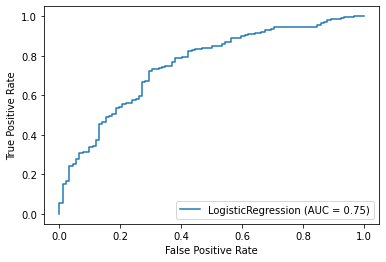

In [ ]:
plot_roc_curve(model_lg, X_test[features], y_test)

In [ ]:
## 함수로 그냥 그리기 

def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
  
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )ㅈ

#### 2) 다항 로지스틱 회귀분석

In [ ]:
from sklearn.datasets import load_iris 
iris=load_iris()
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
y=pd.get_dummies(iris_df['species'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.loc[:,'sepal_length':'petal_width'], y, test_size=0.3, random_state=42)

In [ ]:
model_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [ ]:
y_test

,setosa,versicolor,virginica
73,0,1,0
18,1,0,0
118,0,0,1
78,0,1,0
76,0,1,0
31,1,0,0
64,0,1,0
141,0,0,1
68,0,1,0
82,0,1,0


In [ ]:
model_multi.fit(X_train, y_train)

ValueError: y should be a 1d array, got an array of shape (105, 3) instead.

In [ ]:
y_pred_lg=model_lg.predict(X_test[features])

## **나. 의사결정나무**
: 의사결정나무를 실행하기 위한 함수는 tree, ctree, rpart 등의 방법이 있음.   
: tree함수는 불순도의 측도로 엔트로피 지수를 사용.   
: ctree함수는 분석 결과에서 별도로 가지치기할 필요가 없지만 입력 변수는 31개까지만 입력가능.   
: rpart함수는 CART 방법을 사용.    
: 이번 과정에서는 rpart 함수를 활용하여 의사결정나무 분석 결과를 확인. 

### **1) rpart** 
: CART(Classification and Regression Trees)를 사용했으며,   
GINI INDEX를 가장 많이 감소시켜주는 변수가 영향을 가장 많이 끼치는 변수가 됨.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
credit_df=pd.read_csv('/content/drive/MyDrive/ADP 실기 스터디/데이터 에듀 R 코드/credit_final.csv')
credit_df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,guarantor,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,1,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,1,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,1,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,1,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,1,4,2,38,1,2,2,2,1,1,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(credit_df, credit_df['credit.rating'], test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf=DecisionTreeClassifier(max_depth=5, min_samples_split=15, criterion='gini')

In [ ]:
clf.fit(X_train.iloc[:,1:], y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
preds=clf.predict(X_test.iloc[:,1:])

In [ ]:
preds_prob=clf.predict_proba(X_test.iloc[:,1:])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[ 27,  65],
       [ 17, 191]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.61      0.29      0.40        92
           1       0.75      0.92      0.82       208

    accuracy                           0.73       300
   macro avg       0.68      0.61      0.61       300
weighted avg       0.71      0.73      0.69       300



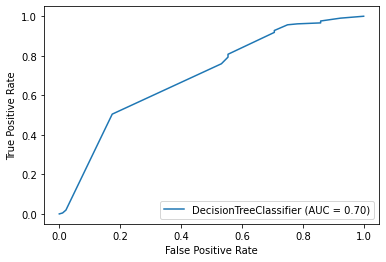

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf, X_test.iloc[:,1:], y_test)

### **multiple split** 

In [ ]:
import seaborn as sns
from sklearn.datasets import load_iris 
iris=load_iris()
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.loc[:,:'petal_width'], iris_df['species'], test_size=0.3, random_state=42)

In [ ]:
clf2=DecisionTreeClassifier(max_depth=7, min_samples_split=5, criterion='entropy')

In [ ]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
preds=clf2.predict(X_test)

In [ ]:
confusion_matrix(y_test, preds)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
clf2.feature_importances_

array([0.        , 0.        , 0.08467161, 0.91532839])

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
import graphviz

In [ ]:
export_graphviz(clf2, out_file='./tree.dot', feature_names=X_test.columns)

In [ ]:
class_names=['0', '1', '2']

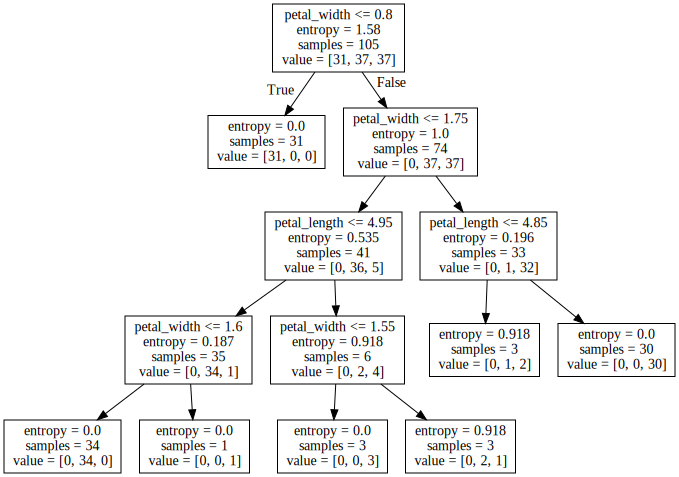

In [ ]:
with open('tree.dot') as f:
  dot_graph=f.read()
  display(graphviz.Source(dot_graph))

## **다. 앙상블 기법**   
: 앙상블 기법은 주어진 자료로부터 여러 개의 예측모형들을 만든 후 예측모형들을 조합하여
: 하나의 최종 예측 모형을 만드는 방법. 학습방법이 가장 불안전한 의사결정나무에 주로 사용

#### **1) 배깅 (Bootstrap aggregating)**
: 주어진 자료에서 여러개의 붓스트랩자료를 생성해 각 붓스트랩 자료에 예측모형을 만든 후 결합하여 최종 예측모형을 만드는 방법.    
붓스트랩은 주어진 자료에서 동일한 크기의 표본을 랜덤 복원추출로 뽑은 자료    
보팅(voting)은 여러 개의 모형으로부터 산출된 결과를 다수결애 의해 최종결과를 선정하는 과정    
배깅에서는 가지치기를 하지 않고 최대로 성장한 의사결정나무 활용    

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=5))
model.fit(X_train, y_train)
print('The accuracy for bagged KNN is:', model.score(X_test, y_test))

The accuracy for bagged KNN is: 0.6833333333333333


<font color=blue> bagging 사용 방법을 잘 모르겠다. 

### **2) 부스팅**
: 예측력이 약한 모형들의 결합하여 강한 예측모형을 만드는 방법으로  
부스팅 방법 중 Adaboost는 이진분류 문제에서 랜던 분류기보다 조금 더 좋은 분류기 n개에
각각 가중치를 설정하고 n개의 분류기를 결합하여 최종 분류기를 만드는 방법을 제안.


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model = AdaBoostClassifier()
model.fit(X_train, y_train)
print('The accuracy for model = AdaBoostClassifier is:', model.score(X_test, y_test))

The accuracy for model = AdaBoostClassifier is: 1.0


In [ ]:
preds=model.predict(X_test)

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00       208

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



<font color=blue> 과적합 된걸까? 이런 것들을 알기 위해서는 어떻게 해야할까?

### **3) 랜덤포레스트**
: 의사결정나무의 특징인 분산이 크다는 점을 고려하여 배깅과 부스팅보다 더 많은 무작위성을 주어   
약한 학습기들을 생성한 후 이를 선형결합하여 최종학습기를 만드는 방법

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
print('The accuracy for model = RandomForestClassifier is:', clf.score(X_test, y_test))

The accuracy for model = RandomForestClassifier is: 1.0


In [ ]:
clf2 = RandomForestClassifier(max_depth=2, random_state=0)
clf2.fit(X_train, y_train)
print('The accuracy for model = RandomForestClassifier is:', clf2.score(X_test, y_test))

The accuracy for model = RandomForestClassifier is: 1.0


In [ ]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


### **라. SVM(Support Vector Machine)**
: 기계학습 분야 중 하나로 패턴인식, 자료 분석 등을 위한 지도학습 모델   
주어진 데이터 집합을 바탕으로 하여 새로운 데이터가 어떤 범주에 속할 것인지를   
판단하는 비확률적 이진 선형 분류 모델을 생성.

In [ ]:
from sklearn.svm import SVC
model_svm=SVC(gamma='auto')
model_svm.fit(X_train, y_train)
print('The accuracy for model = SVM is:', model_svm.score(X_test, y_test))

The accuracy for model = SVM is: 0.6933333333333334


### **마. Naive Bayes Clssification**
: 조건부 독립을 가정하는 알고리즘으로 클래스에 대한 사전 정보와 데이터로부터
추출된 정보를 결합하고, 베이즈 정리를 이용하여 어떤 데이터가 특정 클래스에
속하는지 분류하는 알고리즘

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()
model_nb.fit(X_train, y_train)
print('The accuracy for model = naive bayes is:', model_nb.score(X_test, y_test))

The accuracy for model = naive bayes is: 1.0


<font color=blue> 역시 답이 다름

### **바. K-NN(K-Nearest Neighbor)** 
: 지도학습의 한 종류로 어떤 범주로 나누어져 있는 데이터셋이 있을 때,
새로운 데이터가 추가된다면 이를 어떤 범주로 분류할 것인지를 결정하는 알고리즘
최근적 이웃 간의 거리를 계산할 때, 유클리디안, 멘하탄, 민코우스키 거리 등을 사용
k의 선택은 일반적으로 훈련데이터 개수의 제곱근으로 설정

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)
print('The accuracy for model = KNN is:', model_knn.score(X_test, y_test))

The accuracy for model = KNN is: 0.66


In [ ]:
model_knn2=KNeighborsClassifier(n_neighbors=7)
model_knn2.fit(X_train, y_train)
print('The accuracy for model = KNN is:', model_knn2.score(X_test, y_test))

The accuracy for model = KNN is: 0.6733333333333333


In [ ]:
model_knn3=KNeighborsClassifier(n_neighbors=10)
model_knn3.fit(X_train, y_train)
print('The accuracy for model = KNN is:', model_knn3.score(X_test, y_test))

The accuracy for model = KNN is: 0.6533333333333333


In [ ]:
#분류를 가장 잘하는 최적의 k 값 찾기 위한 함수 구현
result<-numeric()
k=3:22
for(i in k){
  pred<-knn(train.data,test.data,class,k=i-2)
  t<-table(pred,test$credit.rating)
  result[i-2]<-(t[1,1]+t[2,2])/sum(t)
}
result
sort(result,decreasing=T)
which(result==max(result))          

### **사. 인공신경망** 
: 인간의 뇌를 본 따서 만든 모델로 뉴런을 흉내 낸 노드들이 입력층, 은닉층, 출력층으로 구분되어 나열
예측성능이 우수하며 특히, 은닉층에서 입력 값이 조합되므로 비선형적인 문제를 해결할 수 있음.
그러나 직관적인 이해가 어렵고 수작업으로 모델을 수정하기 어려움.

In [ ]:
from sklearn.neural_network import MLPClassifier
model_mlp=MLPClassifier(random_state=1, max_iter=300)
model_mlp.fit(X_train, y_train)
print('The accuracy for model = MLP is:', model_mlp.score(X_test, y_test))

The accuracy for model = MLP is: 0.7433333333333333


## **3. 군집분석**
: 각 객체의 유사성을 측정하여 유사성이 높은 대상 집단을 분류하고, 군집에 속한 객체들의 유사성과
서로 다른 군집에 속한 객체간의 상이성을 규명하는 분석 방법.
계층적 군집방법과 비계층적 군집방법이 있음.

### **가. 계층적 군집분석**
: 계층적 군집분석은 n개의 군집으로 시작해 점차 군집의 개수를 줄여 나가는 방법.
최단연결법, 최장연결법, 평균연결법, 와드연결법 등이 있음.


In [ ]:
USArrests_df=pd.read_csv('/content/drive/MyDrive/ADP 실기 스터디/데이터 에듀 R 코드/USArrests.csv', index_col='Unnamed: 0')
print(USArrests_df.shape)
USArrests_df.head()

(50, 4)


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


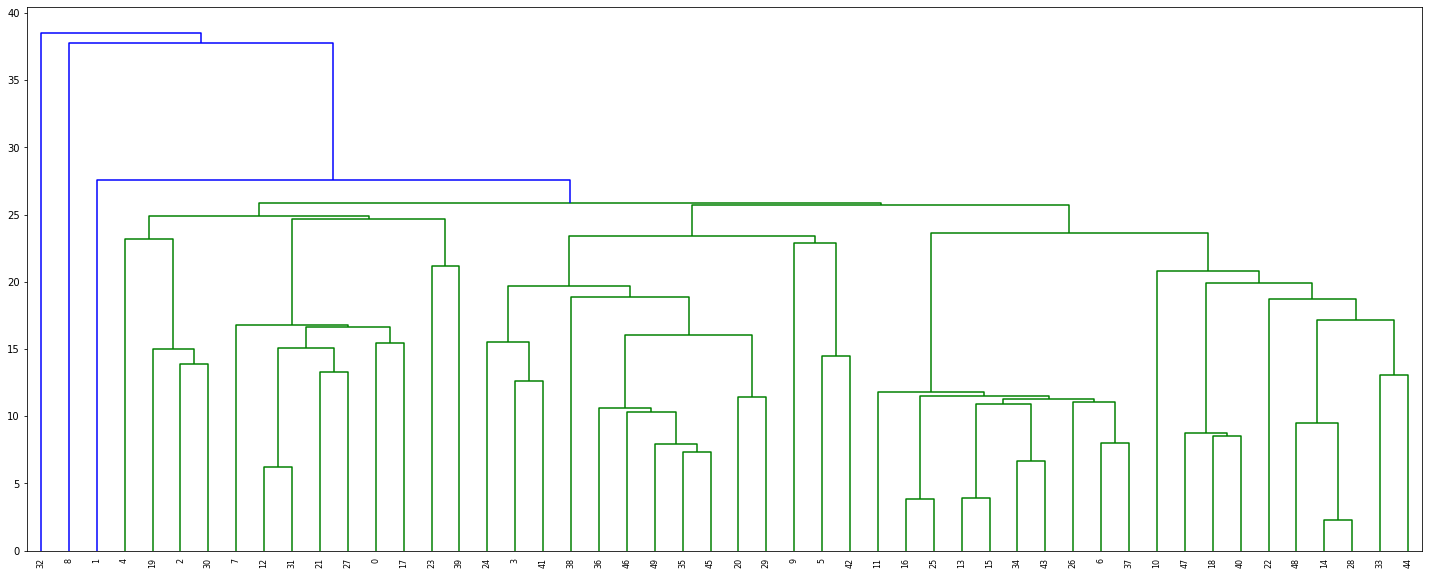

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# 최단거리법
Z = linkage(USArrests_df, method='single', metric='euclidean')

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

In [ ]:
Z_2 = linkage(USArrests_df, method='complete', metric='euclidean')

#최장거리법
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z_2)
plt.show()

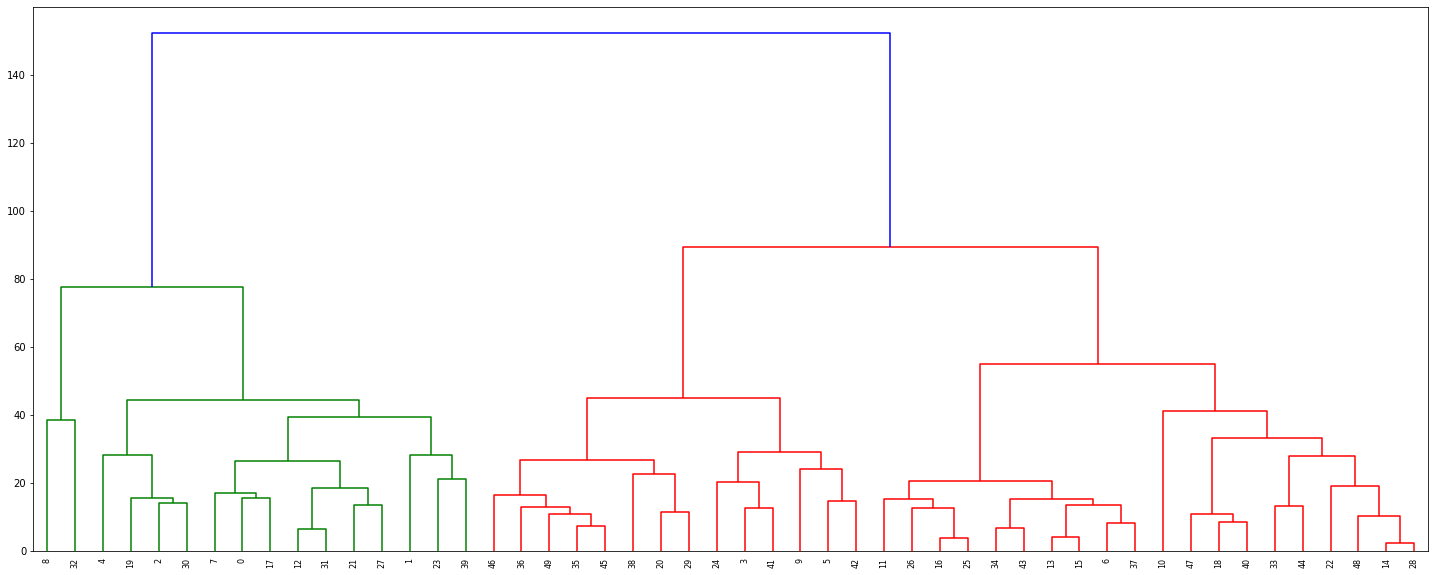

In [ ]:
Z_3 = linkage(USArrests_df, method='average', metric='euclidean')

#평균 거리법
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z_3)
plt.show()

<font color=blue> 이 부분 뭐해야하는지 알 수 없음. 

계층적 군집 결과 그룹 나누기와 덴드로그램 구분 짓기   
group<-cutree(US.average,k=6)
group

## **나. 비계층적 군집분석**
: 군집정보가 없는 데이터에 대해 구하고자 하는 군집의 수를 정한 상태에서 설정된 군집의 중심에 가장 가까운 개체를 하나씩 포함해 가는 방식으로 군집을 형성.   
kmeans, 혼합분포군집, SOM 등이 있음

**1) kmeans cluster**    
: 주어진 데이터를 k개의 클러스터로 묶는 알고리즘으로, 각 클러스터와 거리 차이의 분산을 최소화하는 방식으로 동작

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
kmeans.cluster_centers_

array([[6.05633803e-01, 2.18309859e+00, 3.39154930e+01, 2.38028169e+00,
        2.72535211e+00, 8.01567606e+03, 2.06338028e+00, 2.49295775e+00,
        2.54225352e+00, 2.50000000e+00, 1.05633803e+00, 2.96478873e+00,
        2.94366197e+00, 3.66056338e+01, 1.74647887e+00, 2.09859155e+00,
        1.46478873e+00, 3.23943662e+00, 1.16197183e+00, 1.64084507e+00,
        1.02112676e+00],
       [7.27598566e-01, 2.18996416e+00, 1.81003584e+01, 2.27419355e+00,
        3.01254480e+00, 2.12429570e+03, 1.80465950e+00, 2.43548387e+00,
        3.10394265e+00, 2.35304659e+00, 1.09677419e+00, 2.82616487e+00,
        2.24910394e+00, 3.52616487e+01, 1.83333333e+00, 1.91577061e+00,
        1.35125448e+00, 2.86021505e+00, 1.14336918e+00, 1.37813620e+00,
        1.03405018e+00]])

In [ ]:
#기존의 분류와 군집분석 결과 분류 비교
kmeans.table<-table(train$credit.rating, credit.kmeans$cluster)
kmeans.table
(kmeans.table[1,1] + kmeans.table[2,2]) / sum(kmeans.table)  

In [ ]:
# NbClust -> python에는 적절한 package가 없는 듯함. 

**2) 혼합분포군집**   
: 모형 기반의 군집방법으로 데이터가 k개의 모수적 모형의 가중합으로 표현되는 모집단 모형으로부터
나왔다는 가정하에서 모수와 함께 가중치를 자료로부터 추정하는 방법으로 사용


In [ ]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=0)
gm.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
gm.means_

array([[7.14285714e-01, 1.93506494e+00, 1.90389611e+01, 2.18181818e+00,
        3.00000000e+00, 3.21219482e+03, 1.46753247e+00, 2.31168831e+00,
        2.87012987e+00, 2.46753247e+00, 1.80519480e+00, 2.75324675e+00,
        1.90909091e+00, 3.56623377e+01, 1.81818182e+00, 1.83116883e+00,
        1.32467533e+00, 2.80519481e+00, 1.15584416e+00, 1.33766234e+00,
        1.28571428e+00],
       [7.01444623e-01, 2.21990369e+00, 2.15890851e+01, 2.30979133e+00,
        2.94863563e+00, 3.33265489e+03, 1.90529695e+00, 2.46388443e+00,
        3.00481541e+00, 2.37239165e+00, 1.00000000e+00, 2.86677368e+00,
        2.44943820e+00, 3.55184591e+01, 1.81540931e+00, 1.96789727e+00,
        1.38041734e+00, 2.95345104e+00, 1.14606742e+00, 1.44301766e+00,
        1.00000000e+00]])

## **4. 연관규칙분석**
: 연관규칙분석은 기업의 데이터베이스에서 상품의 구매, 서비스 등 일련의 거래 또는 사건들 간의
규칙을 발견하기 위해 적용. 측도로는 지지도, 신뢰도, 향상도가 있음.

In [ ]:
from mlxtend.frequent_patterns import apriori